# Projekti 1 
### (Analiza e te dhenave/Regresi linear/shumefishte/logjik) 

Analiza e rrogave të punonjësve ne bazë të eksperiencës së tyre.

1 - Eksplorimi i te dhenave:
- Lexoni te dhenat
- Paraqisni te dhenat ne menyre te permbledhur(kolonat, rreshtat, llojet e te dhenave)
- Pastroni te dhenat nga dopiot, te dhenat boshe, lloji i te dhenave
- Llogarisni disa statistika permbledhese.


In [143]:
import pandas as pd

# I lexojn te dhenat nga dataseti 
# ky dataset eshte marre nga kaggle.com (https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer)
df = pd.read_csv("Salary_Data.csv")

df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


Nga kjo informacion mund te shohim qe dataseti ka 2 kolona dhe 30 rreshta. Kolonat jane:
- YearsExperience
- Salary
- City
- Language
- Level

Duke pare te dhenat, mund te shohim qe kolonat 'City', 'Language' dhe 'Level' kane te dhena te tipit string, ndersa kolonat 'YearsExperience' dhe 'Salary' kane te dhena te tipit float.

Ne kete rast Salari eshte variabla e varur, ndersa YearsExperience eshte variabla e pavarur.
Nese deshirojm të përdorim Multilinear Regression, atëherë Age do të jetë variabla e pavarur



In [145]:
#Funksioni per te hequr outlinerat nga dataseti
def drop_outliers(df, column_name):
    percent = 1.5

    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)

    iqr = q3 - q1

    lower_bound = q1 - percent * iqr
    upper_bound = q3 + percent * iqr

    df_no_outliers = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    return df_no_outliers

In [146]:
# Pastrimi i te dhenave

df = df.dropna()  # I heqim te gjitha rreshtat qe jane null
df = df.drop_duplicates()  # I heqim te gjitha rreshtat qe jane duplikate

# I heqim outlinerat
df = drop_outliers(df, 'Years of Experience')
df = drop_outliers(df, 'Salary')

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 371
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  324 non-null    float64
 1   Gender               324 non-null    object 
 2   Education Level      324 non-null    object 
 3   Job Title            324 non-null    object 
 4   Years of Experience  324 non-null    float64
 5   Salary               324 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


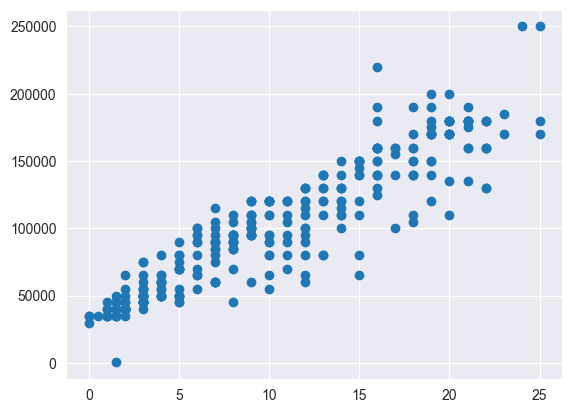

In [147]:
# I vizualizojme te dhenat e pastruara permes grafikeve
import matplotlib.pyplot as plt

# Sekotri per Multilinear Regression
# entry = ['Education Level', 'Job Title']
# 
# for col in entry:
#     df[col] = df[col].astype('category')
#     df[col] = df[col].cat.codes
# X = df.drop(columns=['Age', 'Gender', 'Salary'])

# Nje scatter graf i thjesht per te pare se me cfare dhena kemi pas pastrimit te tyre 
X = df['Years of Experience']
y = df['Salary']

plt.scatter(X, y)

In [148]:
# Llogarisim disa statistika permbledhese
df.describe()


,Age,Years of Experience,Salary
count,324.000000,324.000000,324.000000
mean,37.382716,10.058642,99985.648148
std,7.185844,6.650470,48652.271440
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.500000,9.000000,95000.000000
75%,44.000000,16.000000,140000.000000
max,53.000000,25.000000,250000.000000



Ketu mund te shohim vlerat permes statistikave permbledhese per kolonat 'Years of Experience' dhe 'Salary'
ku kemi 324 vlera te ndryshme per 'Years of Experience' dhe 324 vlera te ndryshme per 'Salary' 
Ktu shohim se rroga mesatare e nje puntori eshte 99985.64 Dollar.

Rroga Maksimale eshte 250000 Dollar me 25 vjet eksperience


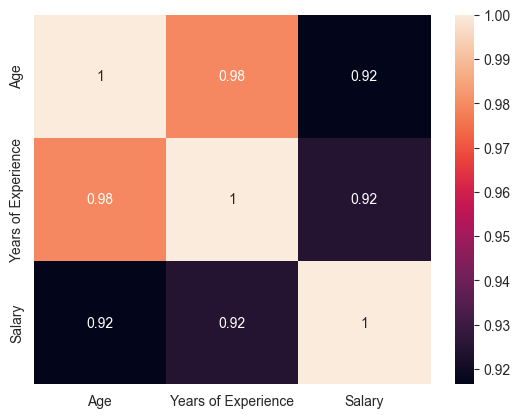

In [149]:
import seaborn as sns

# duke perdorur seaborn e bejm grafin e heatmap

sns.heatmap(df.corr(), annot=True)
plt.show()

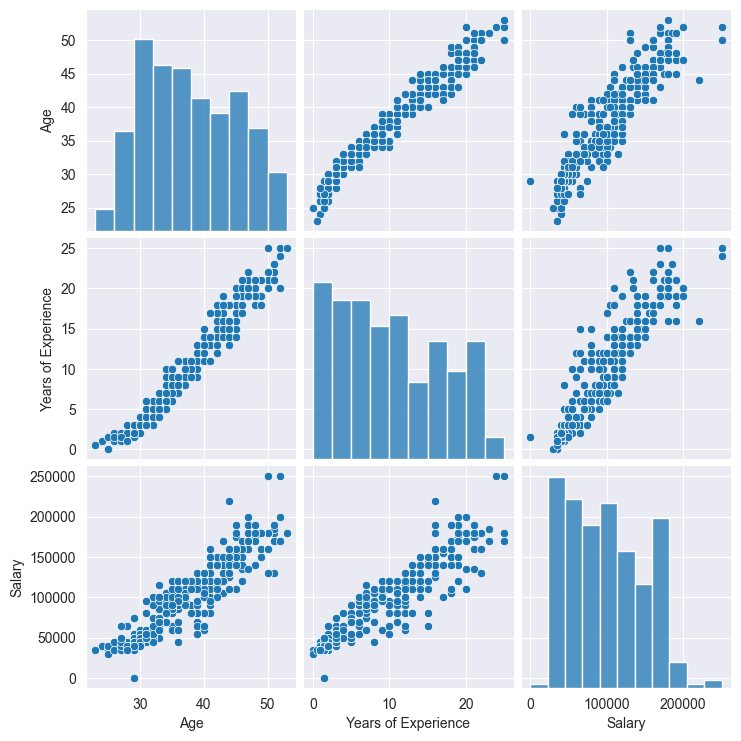

In [150]:
# pairplot per te pare te gjitha krahasimet e mundshme qe i kemi 
sns.pairplot(df)

3 - Analizoni marredhenien  midis dy variablave ne te njejten kohe me ane te paraqitje grafike.

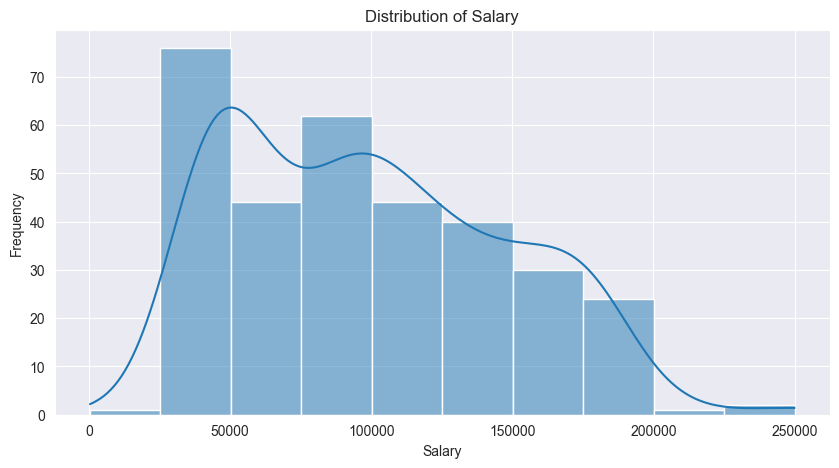

In [151]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Salary'], kde=True, bins=10)
plt.title("Distribution of Salary")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

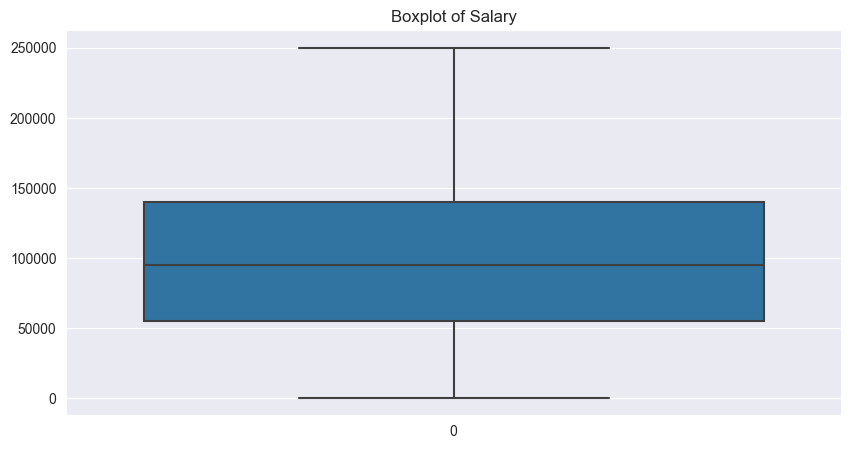

In [152]:
plt.figure(figsize=(10, 5))
sns.boxplot(df['Salary'])
plt.title("Boxplot of Salary")
plt.show()

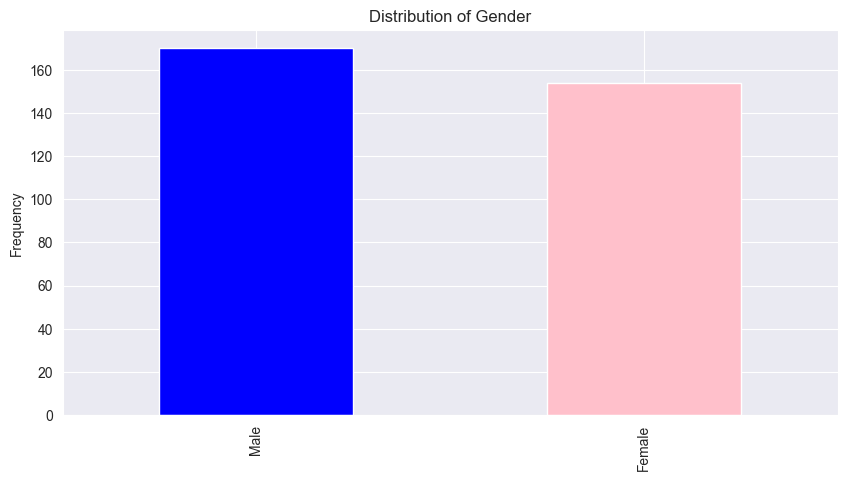

In [153]:
# sa mashkuj dhe femra kemi 
plt.figure(figsize=(10, 5))
df['Gender'].value_counts().plot(kind='bar', color=['blue', 'pink'])
plt.title("Distribution of Gender")
plt.ylabel("Frequency")
plt.show()

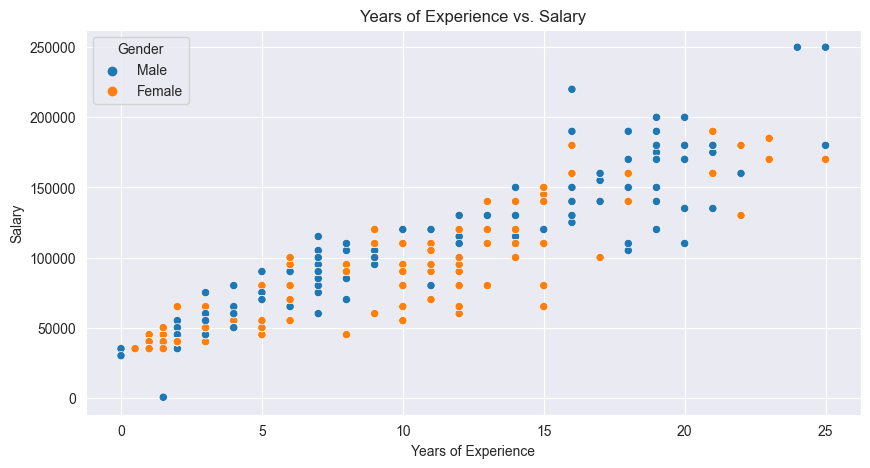

In [154]:
# Scatterplot for relationships
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Years of Experience', y='Salary', data=df, hue='Gender')
plt.title("Years of Experience vs. Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()


4- Analiza e korrelacionit/regresionit: 

-   Ndertoni nje model regresioni
-   Paraqitja grafike
-   Shpjegoni perfundimin


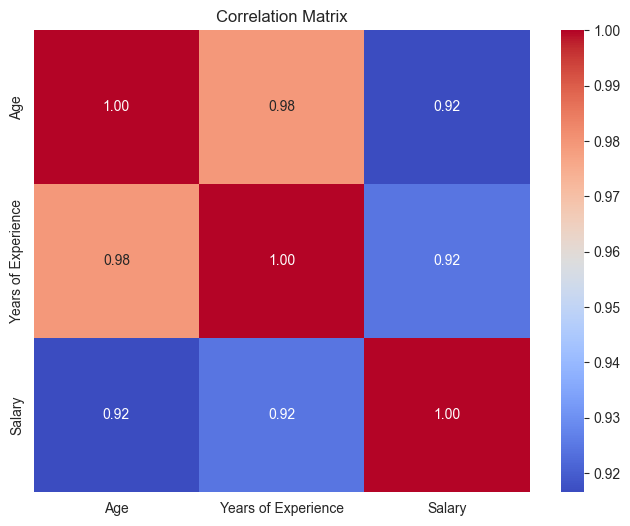

In [155]:
# Correlation matrix
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

#### Ndertimi i modelit te regresionit

In [156]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[['Years of Experience']]  # variabla e varur
y = df['Salary']  # variabla e pavaur

# ndajme te dhenat ne te dhenat e trajnuara dhe te testuara
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Simple Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# I parashikojm te dhenat e testuara dhe te trajnuara
y_train_pred = model.predict(X_train)  # y = mx + c
y_test_pred = model.predict(X_test)

# b1 = model.coef_
# b0 = model.intercept_
# print(b1)
# print(b0)
# 
# y_pred_test = b0 + b1 * x_test

In [157]:
# nje funksion per te shfaqur percentin e nje vlere
def percent_of(value):
    print(f"({round(value, 4) * 100}%)")

### Performaca e modelit ne te dhenat e trajnuara

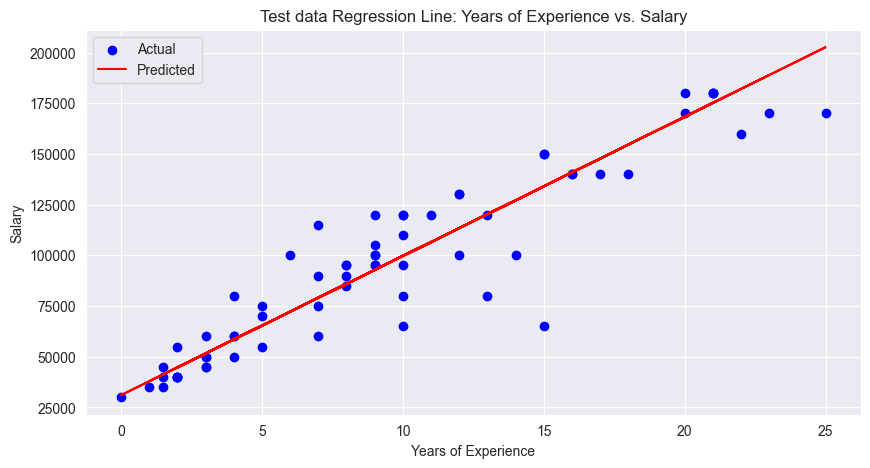

(85.02%)
R^2 Score: 0.85


In [158]:
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_test_pred, color='red', label='Predicted')
plt.title("Test data Regression Line: Years of Experience vs. Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

from sklearn.metrics import r2_score

# r2 dhe model score duhen te ken nje vlere te njejte
percent_of(model.score(X_test, y_test))
r2 = r2_score(y_test, y_test_pred)
print(f"R^2 Score: {r2:.2f}")


### Performanca e modelit ne te dhenat e trajnuara

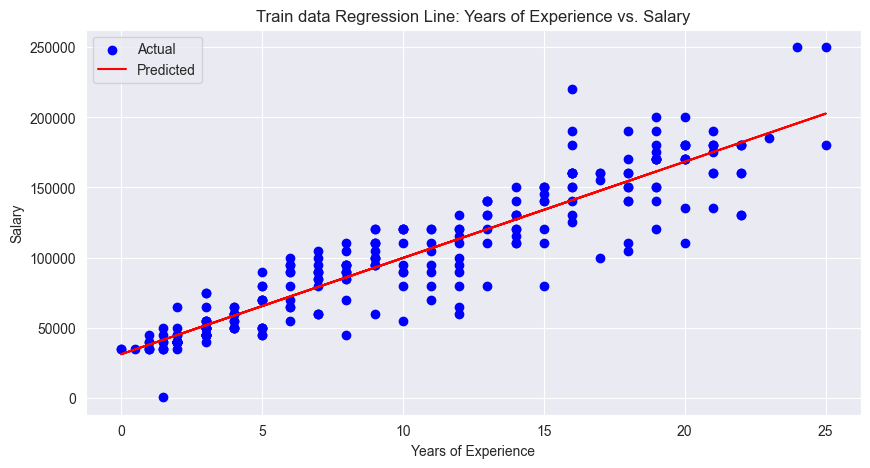

(85.49%)
R^2 Score: 0.85


In [159]:
plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.plot(X_train, y_train_pred, color='red', label='Predicted')
plt.title("Train data Regression Line: Years of Experience vs. Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

from sklearn.metrics import r2_score

# r2 dhe model score duhen te ken nje vlere te njejte
percent_of(model.score(X_train, y_train))
r2 = r2_score(y_train, y_train_pred)

print(f"R^2 Score: {r2:.2f}")


In [160]:
# Shpjegimi i perfundimit

print("Test data results:")
print(f"Accuracy: {model.score(X_test, y_test)}")
print("-------------------------------------------------")

print("Train data results:")
print(f"Accuracy: {model.score(X_train, y_train)}")

# Nga rezultatet e marra, mund te konkludojme se modeli i ndertuar ka nje performace te mire ne te dhenat e testuara dhe te trajnuara rreth 85% korrektesi.


Test data results:
Accuracy: 0.850152763634785
-------------------------------------------------
Train data results:
Accuracy: 0.8548624651340639
